# Hologram of multiple spheres
This notebook demonstrates how to use the object-oriented
interface to compute a hologram
comprised of multiple dielectric spheres in the field
of view simultaneously

In [1]:
%matplotlib inline

In [2]:
from pylorenzmie.theory.LMHologram import LMHologram
from pylorenzmie.theory.CudaLMHologram import CudaLMHologram
from pylorenzmie.theory.Instrument import coordinates
from pylorenzmie.theory.Sphere import Sphere
import matplotlib.pyplot as plt

The LMHologram kernel incorporates the "instrument" that illuminates the sample, collects the light and magnifies it as well as a "particle" that scatters the light.

In [3]:
shape = [480, 640]
coords = coordinates(shape)
kernel = LMHologram(coordinates=coords)

The "particle" that scatters the light can be comprised of a list of Particle objects, including spheres.  Here, we create a sample containing 5 spheres, and move each sphere to a
distinct location.

In [4]:
p = [Sphere() for _ in range(5)]
p[0].r_p = [100,240,100]
p[1].r_p = [200,240,150]
p[2].r_p = [300,240,200]
p[3].r_p = [400,240,250]
p[4].r_p = [500,240,300]
kernel.particle = p

Having defined the scene, we can compute and display the hologram.

In [5]:
%timeit a = kernel.hologram()

1 loops, best of 3: 3.17 s per loop


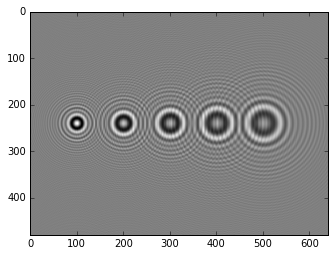

In [6]:
a = kernel.hologram().reshape(shape)
plt.imshow(a, cmap='gray')

In [7]:
cudakernel = CudaLMHologram(coordinates=coords)
cudakernel.particle = p

In [8]:
%timeit a = cudakernel.hologram()

1 loops, best of 3: 510 ms per loop


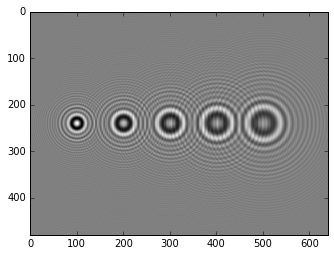

In [9]:
a = cudakernel.hologram().reshape(shape)
plt.imshow(a, cmap='gray')